In [3]:
# Basic python libraries
import numpy as np
import pandas as pd

In [4]:
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pydot as pydot

In [5]:
# Evaulation libraries
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split    

In [6]:
# Deep learning libraries
import tensorflow as tf
import keras as keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import plot_model, to_categorical
from keras.datasets import mnist


In [7]:
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.15.0
Keras version: 2.15.0


In [8]:
# Load the MNIST dataset(Modified National Institute of Standards and Technology database)
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

In [9]:
X_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

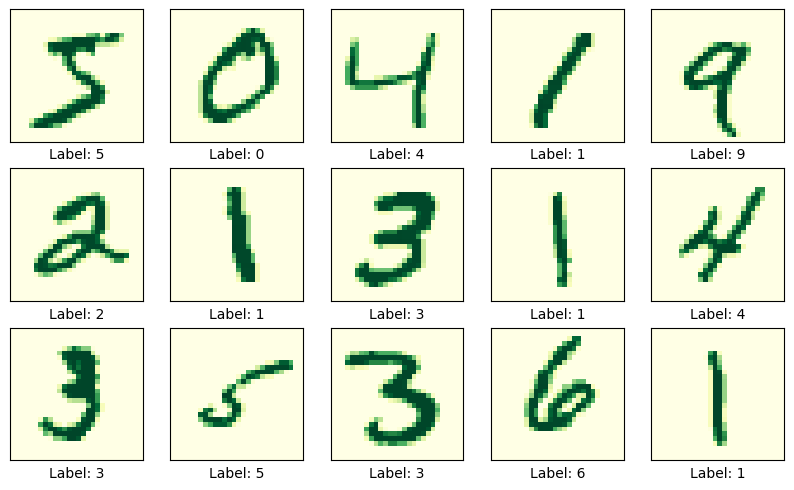

In [10]:
# Names of numbers in the data set in order
number_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

#Visualizing the digits
plt.figure(figsize=(10, 10)) # Set the figure size
for i in range(15):
    plt.subplot(5, 5, i+1) # 5 rows and 5 columns
    plt.xticks([]) # Remove x-axis ticks (horizontal)
    plt.yticks([]) # Remove y-axis ticks (vertical)
    plt.imshow(X_train_digit[i], cmap='YlGn') # Show the digit image in yellow
    #plt.title(number_names[y_train_digit[i]])
    plt.xlabel(f'Label: {y_train_digit[i]}')
    #plt.ylabel('Test')
plt.show()

In [11]:
# Explain what is X_train_digit
#70,000 total images (60K train + 10K test)
#Perfect match: Same number of images and labels
#Standard size: All images are exactly 28×28 pixels
#Ready for ML: Data is already properly formatted
# ANN expects 2D array as input, so we need to reshape the data
#Training Data:
'''
┌─────────────────┐    ┌───────────┐
│ X_train_digit   │    │y_train_   │
│ 60,000 images   │ ←→ │digit      │
│ each 28×28      │    │60,000     │
│ pixels          │    │labels     │
└─────────────────┘    │(0,1,2...9)│
                       └───────────┘

Test Data:
┌─────────────────┐    ┌───────────┐
│ X_test_digit    │    │y_test_    │
│ 10,000 images   │ ←→ │digit      │
│ each 28×28      │    │10,000     │
│ pixels          │    │labels     │
└─────────────────┘    └───────────┘ '''
X_train_digit.shape, y_train_digit.shape, X_test_digit.shape, y_test_digit.shape # 60000 images iruku and ellama 28 * 28 pixesl nu soluthu

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [12]:
X_train_digit = X_train_digit.reshape((60000, 28 * 28)) #Convert the 3d images to 2d images
X_test_digit = X_test_digit.reshape((10000, 28 * 28))

In [13]:
X_train_digit.shape #Input (Preprocess) 3D to 2D for ANN   

(60000, 784)

In [14]:
y_train_digit.shape # 1D array of labels(output)

(60000,)

In [15]:
#Convert labels to one-hot encoding
y_train_digit = to_categorical(y_train_digit, num_classes=10)
y_test_digit = to_categorical(y_test_digit, num_classes=10)
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
#creating base neural networks
# In machin learning no brain activity. in deep learning, there is a brain activity
# This model creation is a sequential process
# Visual diagram
print("\n🎯 SEQUENTIAL MODEL FLOW:")
print("""
┌─────────────┐    ┌─────────────┐    ┌─────────────┐    ┌─────────────┐
│  INPUT      │    │  HIDDEN     │    │  HIDDEN     │    │  OUTPUT     │
│   LAYER     │───▶│   LAYER 1   │───▶│   LAYER 2   │───▶│   LAYER     │
│             │    │             │    │             │    │             │
│ 784 neurons │    │ 128 neurons │    │ 64 neurons  │    │ 10 neurons  │
│ (pixels)    │    │ (ReLU)      │    │ (ReLU)      │    │ (Sigmoid)   │
└─────────────┘    └─────────────┘    └─────────────┘    └─────────────┘
      ↑                   ↑                   ↑                   ↑
  28×28 image        Pattern          Higher-level      Digit
  flattened to      Detection         Features        Prediction
   784 values                                         (0,1,2...9)
""")
#ReLU(-5) = 0    # Negative → Zero
#ReLU(0)  = 0    # Zero → Zero
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid'),
])


print("\n✅ Model created successfully!")
print("🎯 Architecture: 784 → 128 → 64 → 10")
print("🔄 Activations: ReLU → ReLU → Sigmoid")



🎯 SEQUENTIAL MODEL FLOW:

┌─────────────┐    ┌─────────────┐    ┌─────────────┐    ┌─────────────┐
│  INPUT      │    │  HIDDEN     │    │  HIDDEN     │    │  OUTPUT     │
│   LAYER     │───▶│   LAYER 1   │───▶│   LAYER 2   │───▶│   LAYER     │
│             │    │             │    │             │    │             │
│ 784 neurons │    │ 128 neurons │    │ 64 neurons  │    │ 10 neurons  │
│ (pixels)    │    │ (ReLU)      │    │ (ReLU)      │    │ (Sigmoid)   │
└─────────────┘    └─────────────┘    └─────────────┘    └─────────────┘
      ↑                   ↑                   ↑                   ↑
  28×28 image        Pattern          Higher-level      Digit
  flattened to      Detection         Features        Prediction
   784 values                                         (0,1,2...9)



✅ Model created successfully!
🎯 Architecture: 784 → 128 → 64 → 10
🔄 Activations: ReLU → ReLU → Sigmoid


In [17]:
#param_number = output_channel_number * (input_channel_number +1)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222218 (868.04 KB)
Trainable params: 222218 (868.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [18]:
#Compiling the model
model.compile(loss='categorical_crossentropy', # Corrected loss function
              optimizer='adam', # Adam optimizer is widely used and effective
              metrics=['accuracy']) # Accuracy metric for evaluation
print("🚗 LEARNING TO DRIVE ANALOGY:")
print("=" * 40)
print("LOSS = 'How many mistakes did I make?'")
print("  - Hit a cone = High loss ❌")
print("  - Perfect parking = Low loss ✅")
print()
print("OPTIMIZER = 'My driving instructor'")
print("  - 'Turn the wheel more gently next time'")
print("  - 'Brake earlier when approaching a stop'")
print()
print("METRICS = 'My overall driving score'")
print("  - 'You passed 90% of your driving tests!'")
print("  - Easy to understand progress")


🚗 LEARNING TO DRIVE ANALOGY:
LOSS = 'How many mistakes did I make?'
  - Hit a cone = High loss ❌
  - Perfect parking = Low loss ✅

OPTIMIZER = 'My driving instructor'
  - 'Turn the wheel more gently next time'
  - 'Brake earlier when approaching a stop'

METRICS = 'My overall driving score'
  - 'You passed 90% of your driving tests!'
  - Easy to understand progress


In [19]:
history = model.fit(X_train_digit, y_train_digit,
                    epochs=10,
                    batch_size=100, # Number of samples per gradient update
                    validation_data=(X_test_digit, y_test_digit)) #how well the model is generalizing, it's kind of fine tuning the model at the time of building the artifical brain.

Epoch 1/10


600/600 [==============================] - 10s 12ms/step - loss: 1.2577 - accuracy: 0.8332 - val_loss: 0.4105 - val_accuracy: 0.9000
Epoch 2/10
600/600 [==============================] - 6s 10ms/step - loss: 0.2913 - accuracy: 0.9241 - val_loss: 0.2396 - val_accuracy: 0.9345
Epoch 3/10
600/600 [==============================] - 5s 8ms/step - loss: 0.2070 - accuracy: 0.9440 - val_loss: 0.2318 - val_accuracy: 0.9400
Epoch 4/10
600/600 [==============================] - 11s 18ms/step - loss: 0.1646 - accuracy: 0.9556 - val_loss: 0.2098 - val_accuracy: 0.9466
Epoch 5/10
600/600 [==============================] - 9s 15ms/step - loss: 0.1444 - accuracy: 0.9600 - val_loss: 0.1844 - val_accuracy: 0.9566
Epoch 6/10
600/600 [==============================] - 9s 15ms/step - loss: 0.1229 - accuracy: 0.9665 - val_loss: 0.2424 - val_accuracy: 0.9504
Epoch 7/10
600/600 [==============================] - 6s 10ms/step - loss: 0.1089 - accuracy: 0.9691 - val_loss: 0.1773 - val_accuracy: 0.9

In [20]:
test_loss_digit, test_acc_digit = model.evaluate(X_test_digit, y_test_digit)

313/313 [==============================] - 5s 11ms/step - loss: 0.1409 - accuracy: 0.9666


In [21]:
print('Digit MNIST Test accuracy:', round(test_acc_digit,4))

Digit MNIST Test accuracy: 0.9666


In [22]:
#Predicting the labels-DIGIT
y_predict = model.predict(X_test_digit)

313/313 [==============================] - 6s 14ms/step


In [23]:
y_predict[0]

array([1.44577280e-04, 1.05942644e-01, 9.74397302e-01, 9.82625246e-01,
       1.18629704e-03, 2.39128349e-05, 3.27564420e-10, 9.99999046e-01,
       1.16565010e-04, 6.33394837e-01], dtype=float32)

In [24]:
y_predicts=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [25]:
y_predicts[0]

7

In [27]:
y_test_digit_eval[0]

7

In [28]:
y_pre=pd.DataFrame(y_predicts)

In [29]:
y_pre

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [30]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [31]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

OSError: 'seaborn-deep' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.93      0.99      0.96      1135
           2       0.89      0.95      0.92      1032
           3       0.68      0.96      0.79      1010
           4       0.90      0.90      0.90       982
           5       0.83      0.47      0.60       892
           6       0.99      0.84      0.90       958
           7       0.98      0.93      0.96      1028
           8       0.97      0.95      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.90     10000
   macro avg       0.91      0.89      0.89     10000
weighted avg       0.91      0.90      0.90     10000



In [38]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


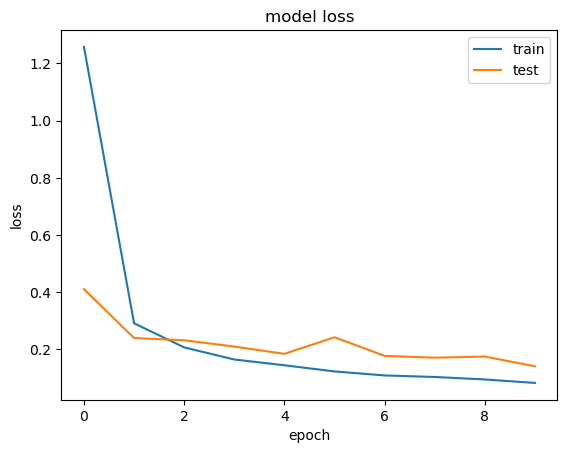

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [34]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

1/1 [==============================] - 0s 464ms/step


In [35]:
y_predicts_single[0]

1

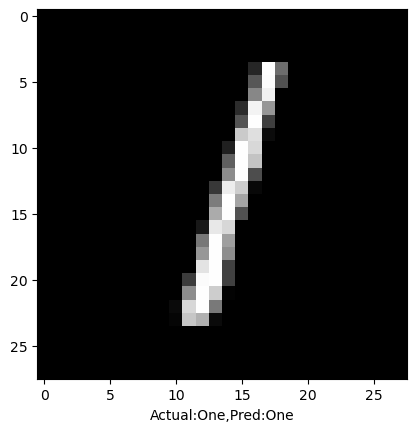

In [36]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()

In [32]:
y_test_digit[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)